LIBRERIAS A UTILIZAR

In [205]:
#data
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Cargar datasets en pandas dataframes

In [54]:
#Carga de dataframe
train = pd.read_csv("/content/drive/MyDrive/COSTARICA/train.csv")
test = pd.read_csv("/content/drive/MyDrive/COSTARICA/test.csv")

In [55]:
print("dimensión del dataframe (Filas, Cols)", train.shape)
train.info()


dimensión del dataframe (Filas, Cols) (9557, 143)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


El dataset cumple con los requerimientos de un mínimo de filas, con 9557, 143 columnas, 5 columnas categóricas, 8 de tipo numérica y 130 de tipo entera, que incluye variables binarias, que toman valores de (0, 1)

#VARIABLES CON NANS

In [216]:
#Copia del dataframe
train_df = train.copy()

In [117]:
#CONTEO DE NANS POR VARIABLE
train_df.isna().sum()[train_df.isna().sum() >0]
#df.isna().sum()[df.isna().sum() >0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

Observamos que 'v2a1' (Valor de renta mensual) tiene gran número de Nans, que pueden ocurrir porque la casa sea propia y pagada o la persona sea dependiente. En este caso decidimos reemplazar los NaNs por ceros.
'v18q1' (Tiene una tablet) tiene gran número de NaNs, por lo que también decidimos reemplazarlos por ceros.
'rez_esc' (años de atraso en la escolaridad) vamos a reemplazar los NaNs por 0.


In [131]:
print(train_df[['v2a1','v18q1','rez_esc']])
train_df['v2a1'].fillna(0, inplace=True)
train_df['v18q1'].fillna(0, inplace=True)
train_df['rez_esc'].fillna(0, inplace=True)
print(train_df[['v2a1','v18q1','rez_esc']])

          v2a1  v18q1  rez_esc
0     190000.0    NaN      NaN
1     135000.0    1.0      NaN
2          NaN    NaN      NaN
3     180000.0    1.0      1.0
4     180000.0    1.0      NaN
...        ...    ...      ...
9552   80000.0    NaN      NaN
9553   80000.0    NaN      NaN
9554   80000.0    NaN      NaN
9555   80000.0    NaN      NaN
9556   80000.0    NaN      NaN

[9557 rows x 3 columns]
          v2a1  v18q1  rez_esc
0     190000.0    0.0      0.0
1     135000.0    1.0      0.0
2          0.0    0.0      0.0
3     180000.0    1.0      1.0
4     180000.0    1.0      0.0
...        ...    ...      ...
9552   80000.0    0.0      0.0
9553   80000.0    0.0      0.0
9554   80000.0    0.0      0.0
9555   80000.0    0.0      0.0
9556   80000.0    0.0      0.0

[9557 rows x 3 columns]


#VARIABLES CATEGÓRICAS

El dataset contiene 5 variables categóricas, la variable ID, no aporta al modelo, ya que solo es la identificación de la persona. Entonces vamos a eliminarlo del dataframe.

In [217]:
train_df.select_dtypes(include=['object'])

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no


In [118]:
#COLUMNAS A ELIMINAR
columns_del = ['Id','idhogar']

Función para eliminar columnas

In [119]:
def drop_cols(df):
    df.drop(columns_del, axis=1, inplace=True)

In [120]:
drop_cols(train_df)

In [121]:
def yes_no(df):
  df['edjefe'] = df['edjefe'].replace(['yes'], 1)
  df['edjefe'] = df['edjefe'].replace(['no'], 0)
  df['edjefa'] = df['edjefa'].replace(['yes'], 1)
  df['edjefa'] = df['edjefa'].replace(['no'], 0)
  df['dependency'] = df['dependency'].replace(['no'], 0)
  df['dependency'] = df['dependency'].replace(['yes'], 1)


In [122]:
yes_no(train_df)
train_df.select_dtypes(include=['object'])

,dependency,edjefe,edjefa
0,0,10,0
1,8,12,0
2,8,0,11
3,1,11,0
4,1,11,0
...,...,...,...
9552,.25,9,0
9553,.25,9,0
9554,.25,9,0
9555,.25,9,0


Vamos a analizar el balanceo del dataset, realizando el conteo de las ocurrencias de la variable 'target'

In [64]:
balance = print(train["Target"].value_counts()/(train["Target"].value_counts().sum()))


4    0.627394
2    0.167103
3    0.126504
1    0.079000
Name: Target, dtype: float64


Vamos a graficar la variable 'target' para observar la distribución de los datos en cada categoría.

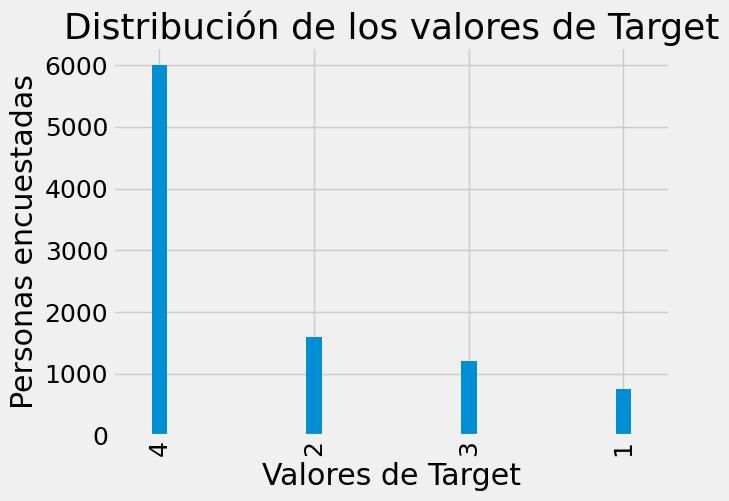

In [123]:
train['Target'].value_counts().plot.bar(width = 0.1)
plt.xlabel("Valores de Target")
plt.ylabel("Personas encuestadas")
plt.title("Distribución de los valores de Target")
plt.show()

In [134]:
#Columnas que tienen valores nulos
train_df.columns[train_df.isnull().sum()>0]

Index(['meaneduc', 'SQBmeaned'], dtype='object')

Vamos a reemplazar los datos NaN de la columna 'v2a1' de renta mensual, reemplazandolos por cero (0)

In [127]:
train_df['SQBmeaned']

0       100.0000
1       144.0000
2       121.0000
3       121.0000
4       121.0000
          ...   
9552     68.0625
9553     68.0625
9554     68.0625
9555     68.0625
9556     68.0625
Name: SQBmeaned, Length: 9557, dtype: float64

In [135]:
#Reemplazar NaNs en 'meaneduc' por la mediana de la variable
train_df['meaneduc'].fillna(train_df['meaneduc'].median(), inplace=True)
train_df['SQBmeaned'].fillna(train_df['SQBmeaned'].median(), inplace=True)

In [136]:
null_counts=train_df.select_dtypes('float64').isnull().sum()
null_counts[null_counts > 0].sum()

0

In [137]:
train_df[['v2a1','v18q1','rez_esc','meaneduc','SQBmeaned']]

,v2a1,v18q1,rez_esc,meaneduc,SQBmeaned
0,190000.0,0.0,0.0,10.00,100.0000
1,135000.0,1.0,0.0,12.00,144.0000
2,0.0,0.0,0.0,11.00,121.0000
3,180000.0,1.0,1.0,11.00,121.0000
4,180000.0,1.0,0.0,11.00,121.0000
...,...,...,...,...,...
9552,80000.0,0.0,0.0,8.25,68.0625
9553,80000.0,0.0,0.0,8.25,68.0625
9554,80000.0,0.0,0.0,8.25,68.0625
9555,80000.0,0.0,0.0,8.25,68.0625


In [138]:
train_df.isna().sum()[train_df.isna().sum() >0]
#df.isna().sum()[df.isna().sum() >0]

Series([], dtype: int64)

In [139]:
print(train_df)

          v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  r4h1  r4h2  \
0     190000.0       0      3       0     1       1     0    0.0     0     1   
1     135000.0       0      4       0     1       1     1    1.0     0     1   
2          0.0       0      8       0     1       1     0    0.0     0     0   
3     180000.0       0      5       0     1       1     1    1.0     0     2   
4     180000.0       0      5       0     1       1     1    1.0     0     2   
...        ...     ...    ...     ...   ...     ...   ...    ...   ...   ...   
9552   80000.0       0      6       0     1       1     0    0.0     0     2   
9553   80000.0       0      6       0     1       1     0    0.0     0     2   
9554   80000.0       0      6       0     1       1     0    0.0     0     2   
9555   80000.0       0      6       0     1       1     0    0.0     0     2   
9556   80000.0       0      6       0     1       1     0    0.0     0     2   

      ...  SQBescolari  SQBage  SQBhoga

'v2a1': 
'v18q1'
'rez_esc'
'meaneduc'
'SQBmeaned'

Crear la lista con la variable respuesta

In [140]:
y = train_df['Target']
y

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64

Naive Bayes

In [197]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df, y, test_size=0.30, random_state=150
)


# CLASSIFICADOR GAUSSIANO
model = GaussianNB()

# ENTRENAMIENTO DEL MODELO
model.fit(X_train, y_train)

# PREDICCION DEL MODELO
predicted = model.predict(X_test)

y_test = y_test.tolist()

In [198]:




#print("Predicted Value:", predicted)

In [199]:
print(y_test)
print(predicted.tolist())

[4, 1, 3, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 4, 4, 4, 4, 2, 2, 3, 2, 4, 4, 4, 4, 4, 4, 4, 1, 3, 4, 3, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 3, 4, 3, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 3, 4, 2, 4, 4, 4, 4, 2, 4, 3, 4, 4, 4, 2, 4, 3, 2, 3, 4, 4, 4, 3, 4, 1, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 1, 4, 2, 4, 4, 4, 1, 3, 4, 1, 4, 4, 3, 4, 3, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 3, 3, 3, 1, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 3, 4, 4, 3, 4, 4, 2, 4, 4, 1, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 3, 4, 2, 4, 3, 2, 3, 2, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 1, 1, 3, 1, 4, 4, 4, 3, 4, 2, 2, 4, 4, 4, 1, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 1, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 3, 2, 4, 1, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 3, 3, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 4, 4, 4, 1, 4, 2, 4, 1, 2, 3, 2, 4, 4, 3, 3, 1, 2, 4, 4, 2, 4, 4, 4, 4, 4, 3, 4, 3, 3, 2, 2, 2, 1, 3, 3, 4, 4, 1, 4, 2, 4, 4, 3, 3, 4, 3, 4, 4, 2, 1, 4, 4, 4, 2, 4, 2, 

In [218]:
#ACCURACY
accuracy = accuracy_score(y_test, predicted)
accuracy
preds = accuracy_score(y_test, predicted, normalize=False)
print(accuracy)
print(preds)
predicted.shape

0.5662482566248257
1624


(2868,)

In [214]:
#F1score
f1_score(y_test, predicted, average="weighted")

0.5853595411664059